In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/JackyP/testing/master/datasets/nycflights.csv", index_col=0)
df["data"] = pd.to_datetime(df[['year', 'month', 'day']]) 
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,data
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,2013-01-01
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,2013-01-01
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0,2013-01-01
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0,2013-01-01
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0,2013-01-01


### Baixa e Média Precisão

In [4]:
print(len(df.loc[(df["month"]==1) & (df["carrier"]=="9E")]))
df.pivot_table(index='month', columns='carrier', values="year", aggfunc="count").head()

1573


carrier,9E,AA,AS,B6,DL,EV,F9,FL,HA,MQ,OO,UA,US,VX,WN,YV
month,,,,,,,,,,,,,,,,
1,1573.0,2794.0,62.0,4427.0,3690.0,4171.0,59.0,328.0,31.0,2271.0,1.0,4637.0,1602.0,316.0,996.0,46.0
2,1459.0,2517.0,56.0,4103.0,3444.0,3827.0,49.0,296.0,28.0,2044.0,NaN,4346.0,1552.0,271.0,911.0,48.0
3,1627.0,2787.0,62.0,4772.0,4189.0,4726.0,57.0,316.0,31.0,2256.0,NaN,4971.0,1721.0,303.0,998.0,18.0
4,1511.0,2722.0,60.0,4517.0,4092.0,4561.0,57.0,311.0,30.0,2211.0,NaN,5047.0,1727.0,466.0,980.0,38.0
5,1462.0,2803.0,62.0,4576.0,4082.0,4817.0,58.0,325.0,31.0,2284.0,NaN,4960.0,1785.0,496.0,1006.0,49.0


Mapa de calor : Compara valores de um indicador numérico entre grupos baseados em outros 2 indicadores, por meio de uma matriz de cores

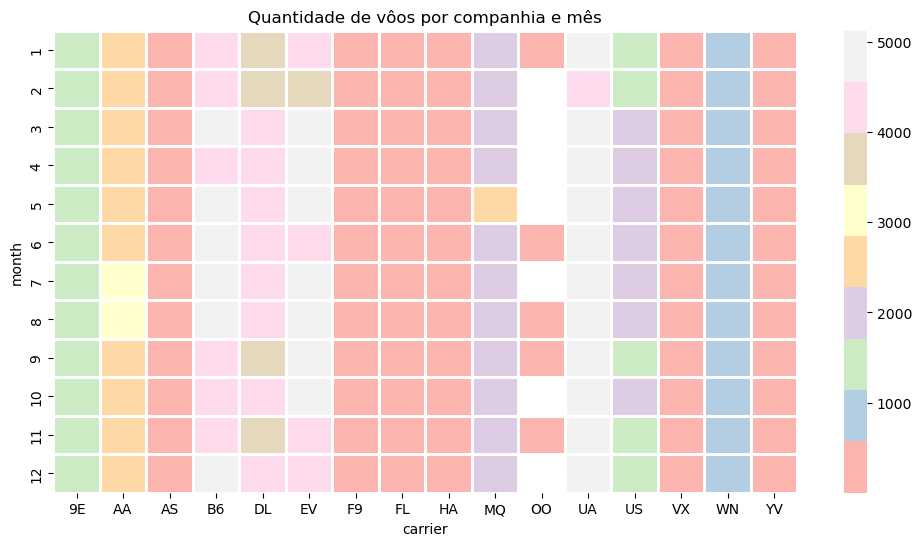

In [9]:
tmp = df.pivot_table(index='month', columns='carrier', values="year", aggfunc="count")
#tmp.fillna(0, inplace=True) # irá mudar a escala
plt.figure(figsize=(12, 6))
sns.heatmap(tmp, linecolor='white', linewidth=1, cmap="Pastel1")
plt.title('Quantidade de vôos por companhia e mês');

Mapa de árvore:  Utilizado para representar as frequências de uma grande quantidade de grupos

In [11]:
from pypalettes import load_cmap
import random

#https://matplotlib.org/stable/users/explain/colors/colormaps.html

cmap = load_cmap('tab20')
colors = cmap.colors*2
print(colors)
random.shuffle(colors)
print(colors)

['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5']
['#2ca02c', '#9467bd', '#d62728', '#ff7f0e', '#2ca02c', '#9467bd', '#ff9896', '#1f77b4', '#aec7e8', '#ff9896', '#aec7e8', '#ff7f0e', '#d62728', '#c5b0d5', '#ffbb78', '#c5b0d5', '#98df8a', '#98df8a', '#1f77b4', '#ffbb78']


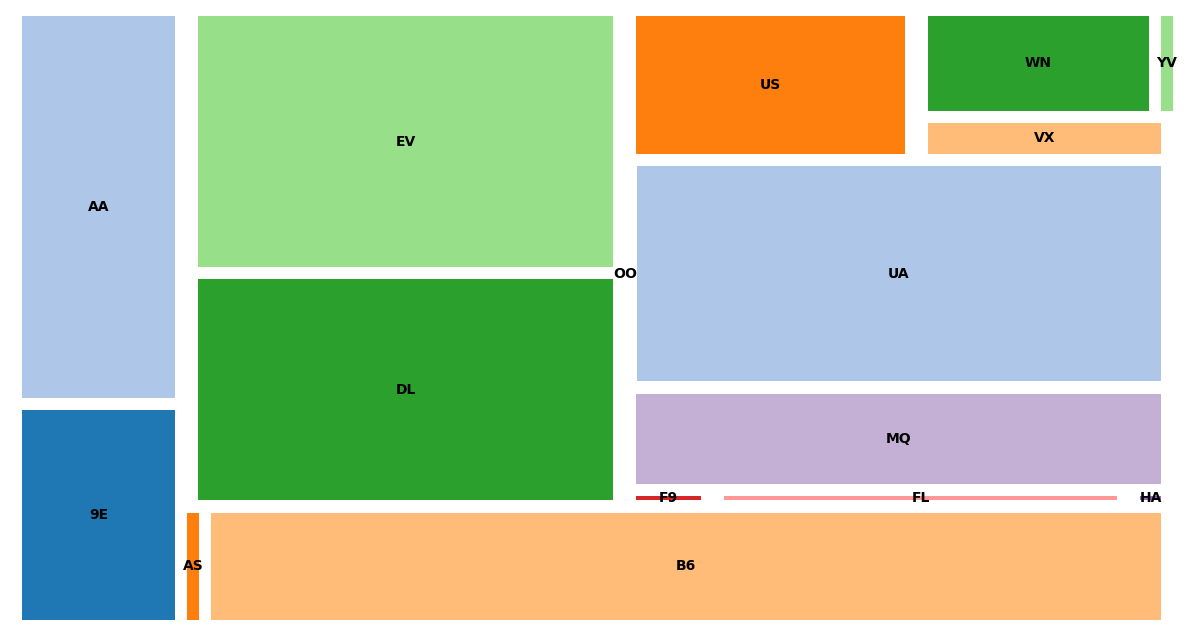

In [14]:
# Mapa de árvore
import squarify

tmp = df.groupby("carrier").count().reset_index()
plt.figure(figsize=(15, 8))

squarify.plot(
    sizes=tmp['day'],
    label=tmp['carrier'],
    text_kwargs={
      'color':'black',
      'fontsize':10,
      'fontweight':'bold'},
   color=cmap.colors, 
   pad=True
   )
plt.axis('off');


Gráfico de setores : Representa frequências por grupo, tal como o gráfico de barras; mas a comparação visual dos grupos é prejudicada por envolver os aspectos de área e ângulo, especialmente se as distribuições forem semelhantes.


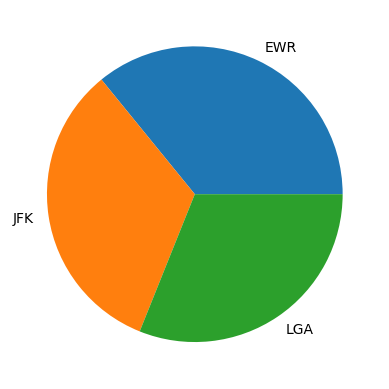

In [15]:
plt.pie(
    dict(df['origin'].value_counts()).values(),
    labels=dict(df['origin'].value_counts()).keys()
    );

In [19]:
df.groupby("origin").count()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,dest,air_time,distance,hour,minute,data
origin,,,,,,,,,,,,,,,,
EWR,120835,120835,120835,117596,117596,117445,117127,120835,120229,120835,120835,117127,120835,117596,117596,120835
JFK,111279,111279,111279,109416,109416,109284,109079,111279,110370,111279,111279,109079,111279,109416,109416,111279
LGA,104662,104662,104662,101509,101509,101334,101140,104662,103665,104662,104662,101140,104662,101509,101509,104662


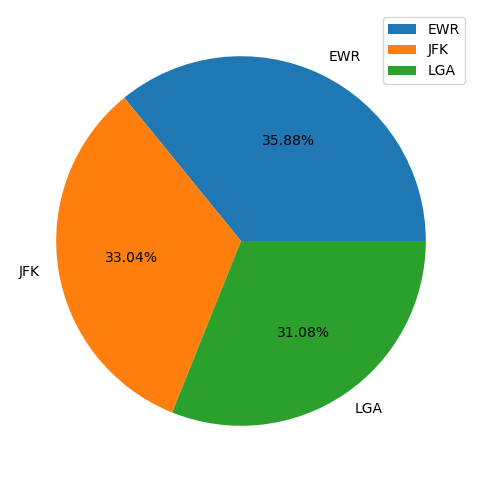

In [25]:
# A partir de um dataframe
tmp = pd.DataFrame(df.groupby("origin").count())
tmp.plot.pie(y='day',
             autopct='%1.2f%%',
             #explode = (0.1, 0, 0),
             ylabel='',
             fontsize=10,
             figsize=(8,6)
             );

Gráfico de roscas : Versão alternativa do gráfico de setores, um pouco mais pautada na noção de comprimento (de arcos)


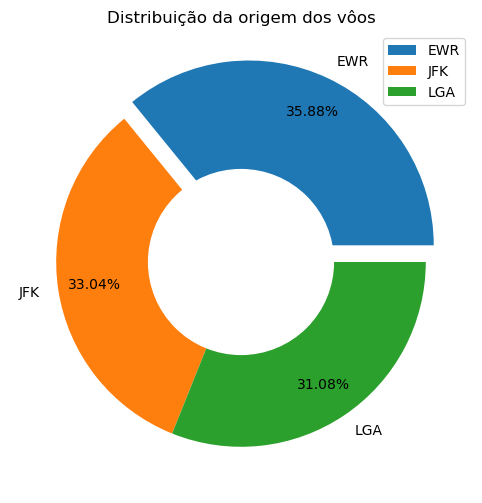

In [23]:
tmp.plot.pie(y='day',
             autopct='%1.2f%%',
             ylabel='',
             explode = (0.1, 0, 0),
             pctdistance=0.8, 
             fontsize=10,
             figsize=(8,6),
             title='Distribuição da origem dos vôos');
circle = plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(circle);

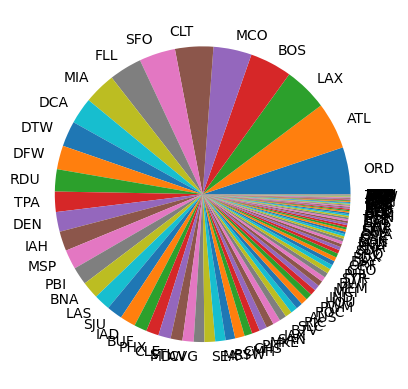

In [28]:
#plt.figure(figsize=(20, 12))

plt.pie(dict(df['dest'].value_counts()).values(),
         labels = dict(df['dest'].value_counts()).keys());

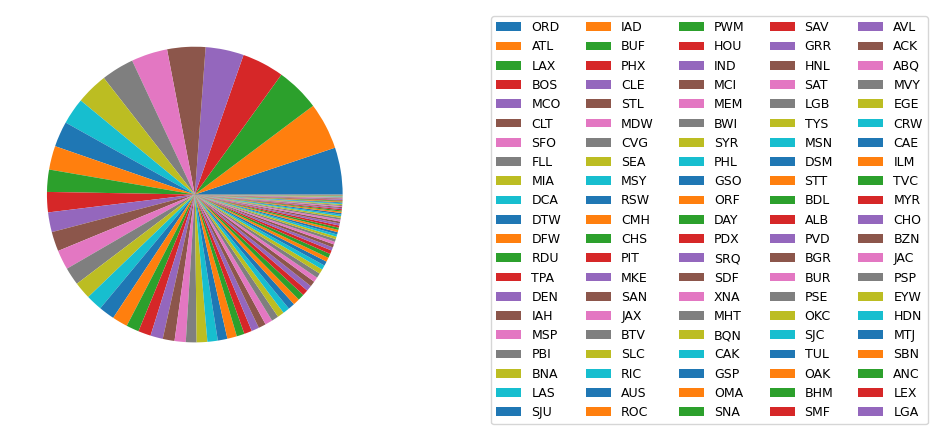

In [29]:
# Melhorando as legendas
plt.pie(dict(df['dest'].value_counts()).values())
plt.legend(labels = dict(df['dest'].value_counts()).keys(),
           loc='upper right', ncol = 5, bbox_to_anchor=[2.5, 1], fontsize=9);

Gráfico de bolhas :  Semelhante a um gráfico de dispersão, mas incorpora um terceiro indicador numérico, representado pelas áreas das bolhas

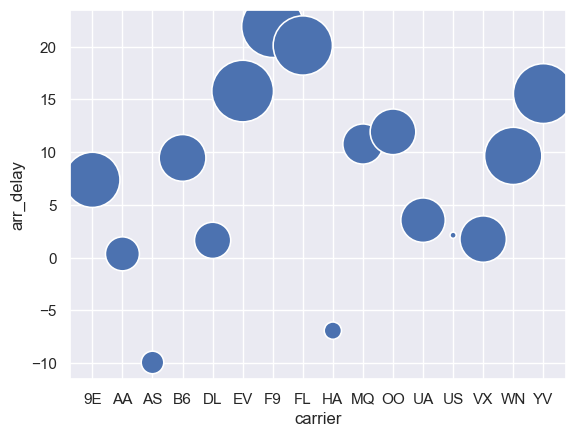

In [31]:
# Bolhas

tmp = df.groupby(["carrier"])[["dep_delay", "arr_delay"]].mean().reset_index()
sns.set_theme(style="darkgrid")

sns.scatterplot(
    data=tmp,
    x="carrier",
    y="arr_delay",
    size="dep_delay",
    legend=False,
    sizes=(20, 2000)
);


### Alta Precisão

Barra simples, utilizado para :
- Representar frequências absolutas ou relativas (%) associadas às categorias de um indicador.
- Comparar valores de um indicador numérico com quebra de grupos.
- Evolução de um indicador numérico ao longo do tempo.

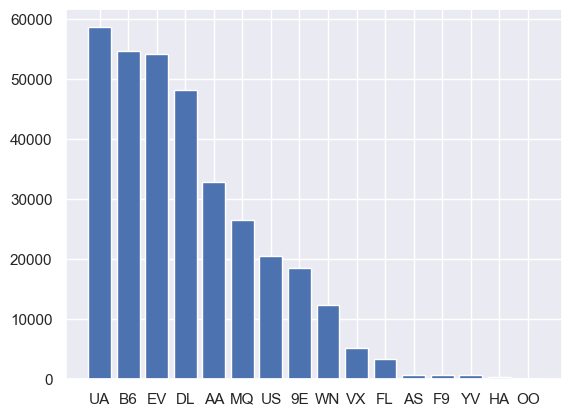

In [32]:
plt.bar(
    list(dict(df['carrier'].value_counts()).keys()),
    list(dict(df['carrier'].value_counts()).values())
    );

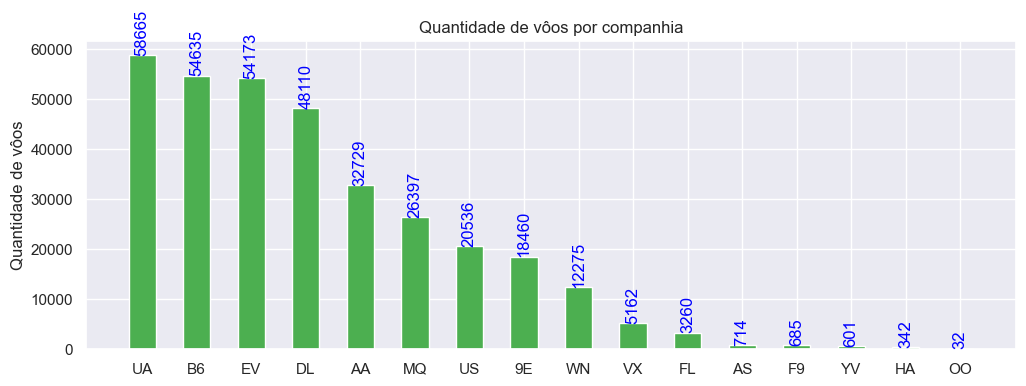

In [33]:
fig, ax = plt.subplots(figsize = (12,4))
ax.bar(
    list(dict(df['carrier'].value_counts()).keys()),
    list(dict(df['carrier'].value_counts()).values()),
    color = "#4CAF50",
    width=.5,
    )
ax.bar_label(ax.containers[0], label_type='edge', color = "blue", rotation = 90)
ax.set_ylabel('Quantidade de vôos')
ax.set_title('Quantidade de vôos por companhia');

Barras empilhadas:
-  Representação de frequências relacionadas a 2+ grupos, ao longo do tempo ou não.
-  Pode-se representar frequências relativas (%), de forma que todas as barras somem 100%


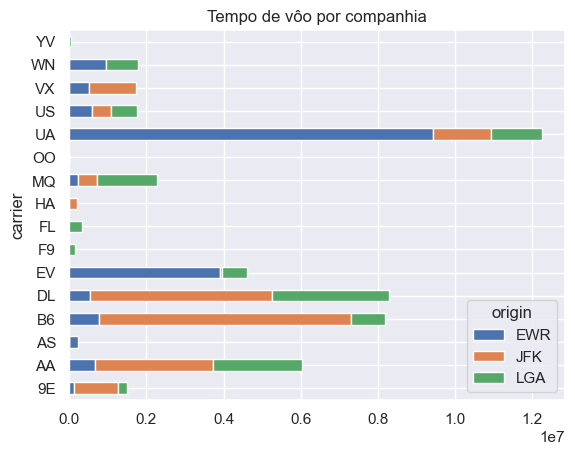

In [36]:
tmp = df.pivot_table(index='carrier', columns='origin', values='air_time', aggfunc="sum").reset_index()
tmp.plot(x='carrier', kind='barh', stacked=True, title='Tempo de vôo por companhia');tmp.plot(x='carrier', kind='bar', stacked=False, 
         title='Tempo de vôo por companhia', 
         figsize=(15,4),
         width=.7,
         ylim=(0, 10000000) # ajuste para ficar com o mesmo limite do de cima
         );

Barra simples agrupado: podem ser úteis quando há 2 ou mais públicos ou indicadores para comparar

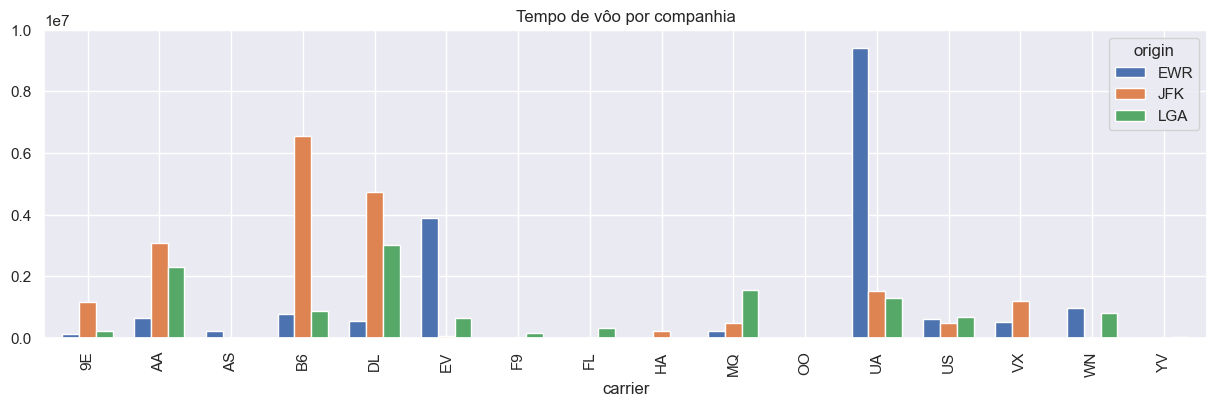

In [42]:
tmp.plot(x='carrier', kind='bar', stacked=False, 
         title='Tempo de vôo por companhia', 
         figsize=(15,4),
         width=.7,
         ylim=(0, 10000000) # ajuste para ficar com o mesmo limite do de cima
         );

Gráfico de linhas
-  Ideal para representar evolução de um indicador numérico ao longo do tempo, devido à noção de direção: aumento/redução.
- Pode ser utilizado para comparar a evolução por grupo, desde que não haja muitas intersecções entre as linhas.
-  Funciona melhor que o gráfico de barras para evoluções, especialmente quando há alta quantidade de pontos.

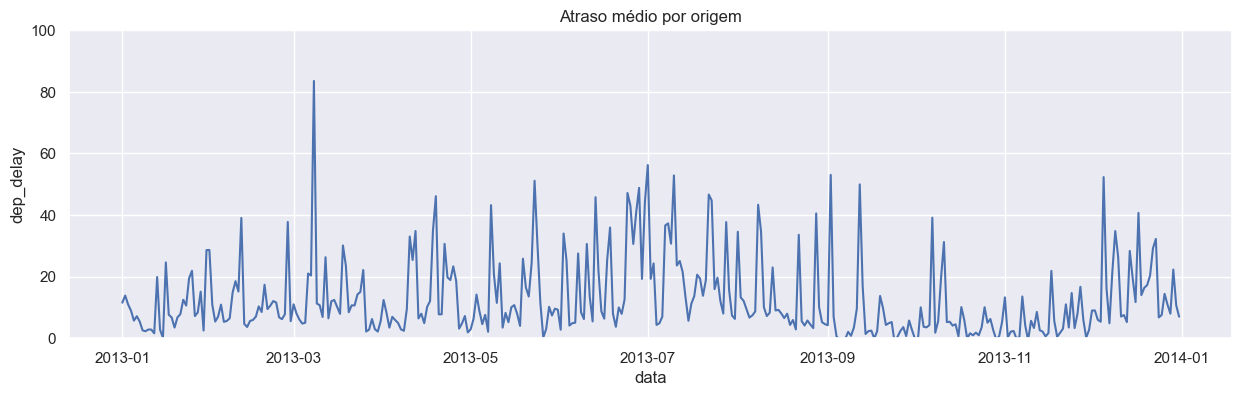

In [43]:
tmp = df.groupby(["data"])["dep_delay"].mean().reset_index()
plt.figure(figsize=(15,4))
plt.ylim(0, 100)
plt.title("Atraso médio por origem")
sns.lineplot(data=tmp, x="data",y='dep_delay');

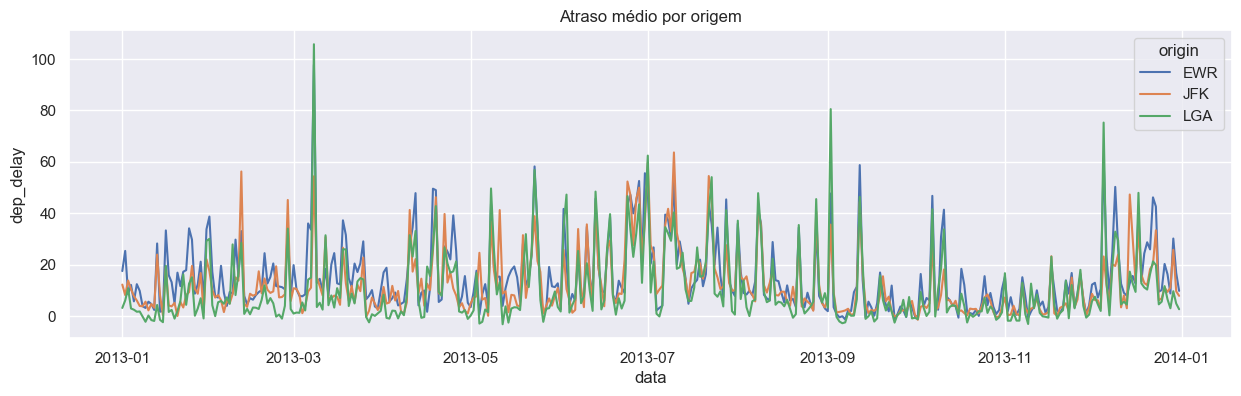

In [44]:
# Multiplos grupos

tmp = df.groupby(["data","origin"])["dep_delay"].mean().reset_index()
plt.figure(figsize=(15,4))
plt.title("Atraso médio por origem")
sns.lineplot(data=tmp, x="data",y='dep_delay', hue='origin');

Gráficos de dispersão: Utilizado para avaliar relações entre dois indicadores numéricos

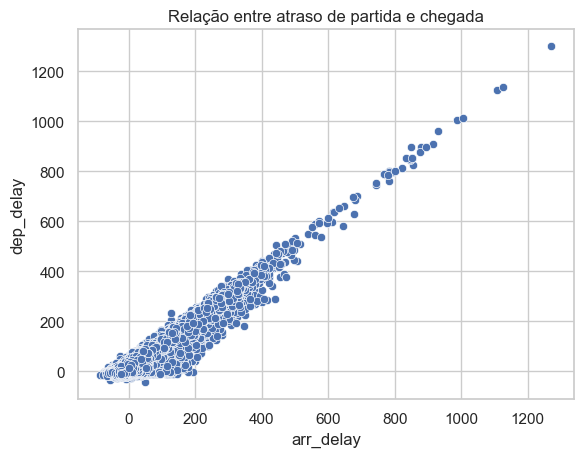

In [47]:
sns.set_style("whitegrid")
ax = sns.scatterplot(data=df, x="arr_delay", y="dep_delay")
ax.set_title("Relação entre atraso de partida e chegada");

Gráficos em cascata (waterfall) :  Utilizado para representar parcelas positivas e negativas que compõem a variação de um indicador numérico, ao longo do tempo


In [52]:
tmp = df.pivot_table(index='data', columns='carrier', values='dep_delay', aggfunc="mean").reset_index()
tmp.set_index("data").resample(rule = 'ME').mean().reset_index()

carrier,data,9E,AA,AS,B6,DL,EV,F9,FL,HA,MQ,OO,UA,US,VX,WN,YV
0,2013-01-31,18.633978,6.871178,7.354839,9.458895,3.794555,23.929608,9.419355,2.369795,54.387097,6.483237,67.000000,8.288307,1.688854,0.906207,9.066485,15.062500
1,2013-02-28,16.971670,8.863046,0.446429,13.442851,6.024321,21.105281,28.288462,5.231710,17.357143,9.064478,NaN,8.671816,1.038639,7.016865,12.152299,10.717391
2,2013-03-31,14.043518,8.652322,8.419355,14.301711,9.969592,27.924170,20.419355,18.916791,1.161290,7.844336,NaN,11.764736,2.913518,9.522581,15.757727,31.888889
3,2013-04-30,15.788138,11.918363,11.316667,15.216327,8.096890,22.653802,23.300000,13.077146,-2.100000,14.342667,NaN,13.295889,3.850946,14.376111,17.841978,29.360000
4,2013-05-31,24.923250,9.656802,6.774194,10.018303,9.667905,20.202144,34.032258,19.761486,-1.451613,14.612274,NaN,12.153061,3.276270,17.830645,17.425972,17.260000
5,2013-06-30,31.002024,14.444982,13.083333,20.174708,18.504591,26.457828,27.733333,38.244577,1.466667,21.332230,61.000000,19.807920,10.497769,28.412500,29.895155,48.479167
6,2013-07-31,32.665439,12.113394,2.419355,25.107190,20.335186,26.334760,35.048387,43.240527,-1.709677,21.510718,NaN,19.858200,9.567002,35.763951,24.695830,26.888889
7,2013-08-31,18.265442,7.110983,2.870968,15.629500,9.700738,16.373814,21.566667,23.107975,1.677419,10.491452,64.000000,12.208717,4.890402,6.515841,21.306921,26.611111
8,2013-09-30,9.189796,5.754794,-4.516667,6.463039,5.317187,8.562671,7.341667,16.938757,-5.440000,5.744625,-4.941176,6.863581,2.390950,6.987599,13.824982,10.011111
9,2013-10-31,9.632032,2.961950,0.677419,2.814546,3.335244,13.348159,9.096774,13.306644,-5.095238,4.605818,NaN,6.631118,0.257094,3.964535,12.182512,19.855556


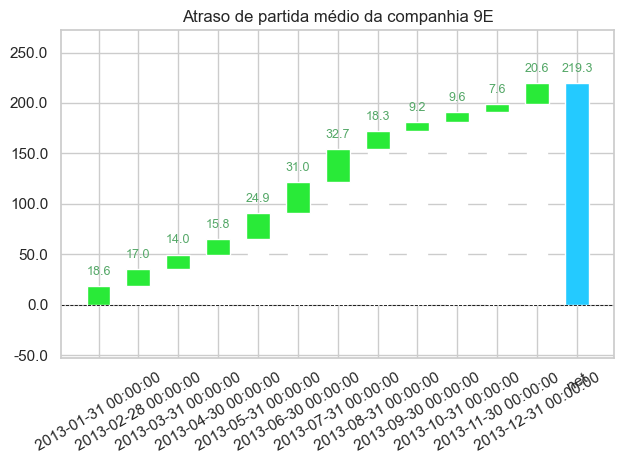

In [56]:
import waterfall_chart

tmp = df.pivot_table(index='data', columns='carrier', values='dep_delay', aggfunc="mean").reset_index()
tmp = tmp.set_index("data").resample(rule = 'ME').mean().reset_index()
waterfall_chart.plot(tmp["data"], tmp["9E"], Title="Atraso de partida médio da companhia 9E");

O gráfico acima não está correto, pois está considerando cada obeservação com uma soma acumulada, e não a diferença entre elas

In [57]:
print(tmp[["data","9E"]])
print(tmp["9E"].diff(1))

carrier       data         9E
0       2013-01-31  18.633978
1       2013-02-28  16.971670
2       2013-03-31  14.043518
3       2013-04-30  15.788138
4       2013-05-31  24.923250
5       2013-06-30  31.002024
6       2013-07-31  32.665439
7       2013-08-31  18.265442
8       2013-09-30   9.189796
9       2013-10-31   9.632032
10      2013-11-30   7.579949
11      2013-12-31  20.611186
0           NaN
1     -1.662308
2     -2.928152
3      1.744620
4      9.135112
5      6.078774
6      1.663415
7    -14.399997
8     -9.075646
9      0.442236
10    -2.052083
11    13.031237
Name: 9E, dtype: float64


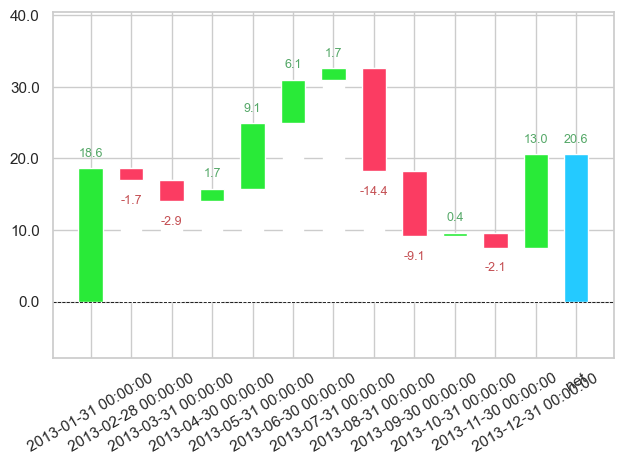

In [58]:
waterfall_chart.plot(tmp["data"], tmp["9E"].diff(1).fillna(18.6));

Estatísticos - Histograma:
-  Tal como o gráfico de barras, representa frequências, mas agora divididas por faixas de valores de um indicador numérico.
- Diferencia-se pela continuidade, por meio de barras justapostas; denota centralidade, simetria e dispersão

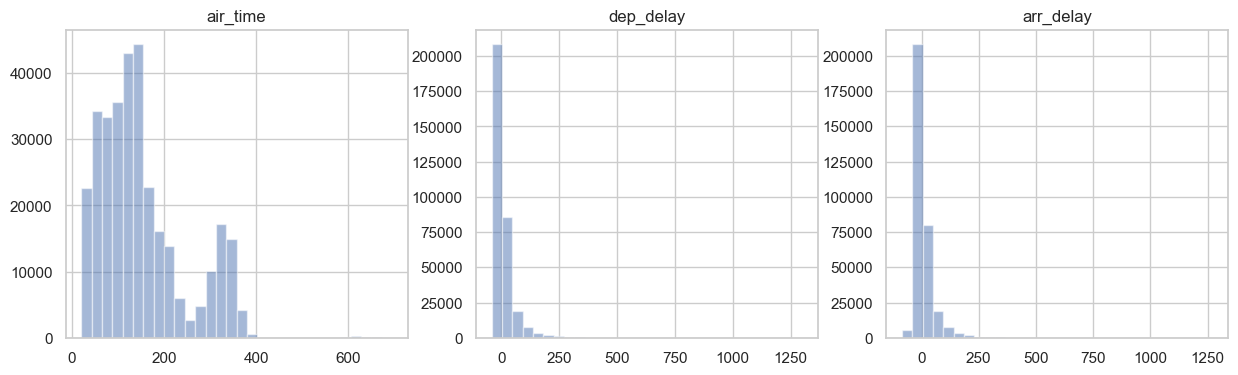

In [59]:
fig = plt.figure(figsize =(15, 4))
bin = 30

plt.subplot(1, 3, 1) # O recurso subplot te permite alinhar as imagens como desejar, aqui serão 1 linha e 3 colunas
plt.hist(df['air_time'], alpha=0.5, bins = bin)
plt.title('air_time')

plt.subplot(1, 3, 2)
plt.hist(df['dep_delay'], alpha=0.5, bins = bin)
plt.title('dep_delay')

plt.subplot(1, 3, 3)
plt.hist(df['arr_delay'], alpha=0.5, bins = bin)
plt.title('arr_delay')

plt.show()